Objetivos:
* Crear nuevas variables
* Transformar las ya existentes

In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sqlalchemy as sa
import seaborn as sns

%config IPCompleter.greedy=True

# 1. Carga de archivos

In [199]:
con=sa.create_engine('sqlite:///../cas1/airbnb.db')

df=pd.read_sql('df',con=con)
df

                    

,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,precio_m2,distrito
0,0,6369,"Rooftop terrace room , ensuite bathroom",13660,Chamartín,Hispanoamérica,40.457240,-3.676880,Private room,60,...,t,2,1,1.0,80,4.87,4.89,4.77,5098,Chamartín
1,1,21853,Bright and airy room,83531,Latina,Cármenes,40.403810,-3.741300,Private room,31,...,f,1,1,1.0,33,4.58,4.82,4.21,2267,Latina
2,2,23001,Apartmento Arganzuela- Madrid Rio,82175,Arganzuela,Legazpi,40.388400,-3.695110,Entire home/apt,50,...,f,6,3,5.0,0,NaN,NaN,NaN,4085,Arganzuela
3,3,24805,Gran Via Studio Madrid,346366726,Centro,Universidad,40.421830,-3.705290,Entire home/apt,92,...,f,3,1,1.0,12,4.92,5.00,5.00,4827,Centro
4,4,26825,Single Room whith private Bathroom,114340,Arganzuela,Legazpi,40.389750,-3.690180,Private room,26,...,f,1,1,1.0,149,4.68,4.71,4.70,4085,Arganzuela
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17705,17705,52182264,Enormous Private Room in 12-Bedroom Unit - los...,378060726,Centro,Justicia,40.424384,-3.691216,Private room,29,...,f,1,1,0.0,0,NaN,NaN,NaN,4827,Centro
17706,17706,52182273,Stunning Private Room in 11-Bedroom Unit - los...,378060726,Centro,Justicia,40.424447,-3.691309,Private room,29,...,f,1,1,0.0,0,NaN,NaN,NaN,4827,Centro
17707,17707,52182303,Classic Private Room in 7-Bedroom Unit - los 3...,378060726,Centro,Justicia,40.424989,-3.691783,Private room,29,...,f,1,1,0.0,0,NaN,NaN,NaN,4827,Centro
17708,17708,52182321,Elegant Private Room in 12-Bedroom Unit - los ...,378060726,Salamanca,Recoletos,40.424352,-3.690211,Private room,29,...,f,1,1,0.0,0,NaN,NaN,NaN,6114,Salamanca


# 2. Creación variables

Repaso de objetivo:

* Perfiles de inmuebles que maximizan el potencial comercial en el mercado del alquiler turístico* 
Las principales zonas donde buscarlos

Repaso kpis:

* La ocupación será el número de días anuales que el inmueble se pueda alquilar
* El precio del alquiler es medido como el precio por noche en euros según Airbnb
* El precio de un inmueble es la multiplicación entre el número de metros cuadrados y el precio medio del m2 en su zona

A continuación voy a crear las 3 variables que permitan cuantificar los kpis.



## 2.1 Variable precio alquiler

En el notebook 2 de creación datamartt, hemos visto que hay diferentes tipos de apartamenos:

In [200]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

Si un apartamento tiene más de una habitacion (privada o compartida), se puede alquilar a una misma pesona. 

Por otro lado, no siempre que se alquile estaran todas las habitaciones llenas, es por eso que voy a aplicar un factor de corrección en el precio del 0,7.

In [201]:
def precio(x):
    if (x.beds>1)&((x.room_type=='Private room')|(x.room_type=='Shared room')):
        salida=x.price*x.beds*0.7
    else:
        salida=x.price
    return(salida)

In [202]:
df['precio_total']=df.apply(precio,axis=1)
df[['beds','precio_total','room_type','price']].head(20)

,beds,precio_total,room_type,price
0,1.0,60.0,Private room,60
1,1.0,31.0,Private room,31
2,5.0,50.0,Entire home/apt,50
3,1.0,92.0,Entire home/apt,92
4,1.0,26.0,Private room,26
5,3.0,85.0,Entire home/apt,85
6,2.0,65.0,Entire home/apt,65
7,1.0,54.0,Entire home/apt,54
8,3.0,1400.0,Entire home/apt,1400
9,2.0,81.0,Entire home/apt,81


## 2.2 Variable ocupación

Es restar 365(1año) a la disponibilidad (availability_365) y sacarlo en porcentaje.

In [203]:
df['ocupacion']=(365-df.availability_365)*100/365

In [204]:
df[['ocupacion']]

,ocupacion
0,50.684932
1,0.273973
2,39.178082
3,68.493151
4,4.383562
...,...
17705,1.917808
17706,1.917808
17707,1.917808
17708,1.917808


## 2.3 Variable precio compra

Es necesario conocer los metros cuadrados de los apartamentos. Vamos a realizar la siguiente estimacion:

* Apartamento de 1 hab = 50m2 totales.
* Apartamento de 2 hab = 70m2 totales.
* Apartamento de 3 hab = 90m2 totales.
* Apartamento de 4 hab = 120m2 totales.
* Apartamento de 5 o más hab = 150m2 totales.

In [205]:
condiciones=[(df.bedrooms==1),
            (df.bedrooms==2),
            (df.bedrooms==3),
            (df.bedrooms==4),
            (df.bedrooms>4)]
resultados=[50,70,90,120,150]

df['m2']=np.select(condiciones,resultados,default=-999)
df

,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,precio_m2,distrito,precio_total,ocupacion,m2
0,0,6369,"Rooftop terrace room , ensuite bathroom",13660,Chamartín,Hispanoamérica,40.457240,-3.676880,Private room,60,...,1.0,80,4.87,4.89,4.77,5098,Chamartín,60.0,50.684932,50
1,1,21853,Bright and airy room,83531,Latina,Cármenes,40.403810,-3.741300,Private room,31,...,1.0,33,4.58,4.82,4.21,2267,Latina,31.0,0.273973,50
2,2,23001,Apartmento Arganzuela- Madrid Rio,82175,Arganzuela,Legazpi,40.388400,-3.695110,Entire home/apt,50,...,5.0,0,NaN,NaN,NaN,4085,Arganzuela,50.0,39.178082,90
3,3,24805,Gran Via Studio Madrid,346366726,Centro,Universidad,40.421830,-3.705290,Entire home/apt,92,...,1.0,12,4.92,5.00,5.00,4827,Centro,92.0,68.493151,50
4,4,26825,Single Room whith private Bathroom,114340,Arganzuela,Legazpi,40.389750,-3.690180,Private room,26,...,1.0,149,4.68,4.71,4.70,4085,Arganzuela,26.0,4.383562,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17705,17705,52182264,Enormous Private Room in 12-Bedroom Unit - los...,378060726,Centro,Justicia,40.424384,-3.691216,Private room,29,...,0.0,0,NaN,NaN,NaN,4827,Centro,29.0,1.917808,50
17706,17706,52182273,Stunning Private Room in 11-Bedroom Unit - los...,378060726,Centro,Justicia,40.424447,-3.691309,Private room,29,...,0.0,0,NaN,NaN,NaN,4827,Centro,29.0,1.917808,50
17707,17707,52182303,Classic Private Room in 7-Bedroom Unit - los 3...,378060726,Centro,Justicia,40.424989,-3.691783,Private room,29,...,0.0,0,NaN,NaN,NaN,4827,Centro,29.0,1.917808,50
17708,17708,52182321,Elegant Private Room in 12-Bedroom Unit - los ...,378060726,Salamanca,Recoletos,40.424352,-3.690211,Private room,29,...,0.0,0,NaN,NaN,NaN,6114,Salamanca,29.0,1.917808,50


In [206]:
df.m2.value_counts()

m2
50     12422
70      3617
90      1228
120      296
150      147
Name: count, dtype: int64

Connclusiones, estimaación el precio de compra del apartamento (inmueble):



In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17710 entries, 0 to 17709
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           17710 non-null  int64  
 1   id                              17710 non-null  int64  
 2   name                            17707 non-null  object 
 3   host_id                         17710 non-null  int64  
 4   neighbourhood_group             17710 non-null  object 
 5   neighbourhood                   17710 non-null  object 
 6   latitude                        17710 non-null  float64
 7   longitude                       17710 non-null  float64
 8   room_type                       17710 non-null  object 
 9   price                           17710 non-null  int64  
 10  minimum_nights                  17710 non-null  int64  
 11  calculated_host_listings_count  17710 non-null  int64  
 12  availability_365                

In [208]:
df['precio_m2']=df['precio_m2'].astype('int64')

In [209]:
df['precio_compra'] = df.m2 * df.precio_m2

In [210]:
df[['bedrooms','m2','distrito','precio_m2','precio_compra']].head(20)

,bedrooms,m2,distrito,precio_m2,precio_compra
0,1,50,Chamartín,5098,254900
1,1,50,Latina,2267,113350
2,3,90,Arganzuela,4085,367650
3,1,50,Centro,4827,241350
4,1,50,Arganzuela,4085,204250
5,3,90,Arganzuela,4085,367650
6,1,50,Centro,4827,241350
7,1,50,Centro,4827,241350
8,2,70,Centro,4827,337890
9,1,50,Centro,4827,241350


# 3.Transformación de varaibles de análisis

In [211]:
df.select_dtypes('number').columns

Index(['index', 'id', 'host_id', 'latitude', 'longitude', 'price',
       'minimum_nights', 'calculated_host_listings_count', 'availability_365',
       'accommodates', 'bedrooms', 'beds', 'number_of_reviews',
       'review_scores_rating', 'review_scores_communication',
       'review_scores_location', 'precio_m2', 'precio_total', 'ocupacion',
       'm2', 'precio_compra'],
      dtype='object')

En este proyecto, las variables candidatas a ser transformadas para poder hacer un analisis de forma más practica en un futuro son: accommodates, bedrooms, beds y number_of_reviews.

Otras que son posible discretizar son ocupacion, precio_total, precio_compram y m2. Pero de momento no lo haré porque son variables muy determinantes, con un rango muy grande (comparado con las discretizadas) y las analizaré sin discretizar.


## 3.1 Discretizar Bedrooms

<Axes: xlabel='bedrooms'>

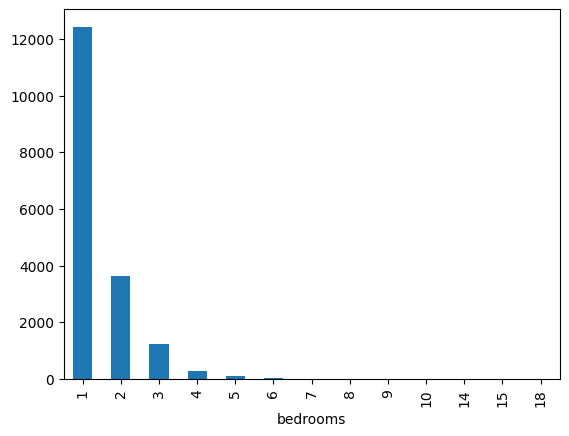

In [212]:
df.bedrooms.value_counts().plot.bar()

In [213]:
df.bedrooms.value_counts()

bedrooms
1     12422
2      3617
3      1228
4       296
5        96
6        23
7        11
8         7
9         3
10        3
14        2
15        1
18        1
Name: count, dtype: int64

In [239]:
cond_bedrooms=[(df.bedrooms==1),(df.bedrooms==2),(df.bedrooms==3),(df.bedrooms>=4)]
result_bedrooms=['1_Una','2_Dos','3_Tres','4_Cuatro_o_mas']

df['bedrooms_disc']=np.select(cond_bedrooms,result_bedrooms,default=-999)

In [215]:
df.bedrooms_disc.value_counts()

bedrooms_disc
Una             12422
Dos              3617
Tres             1228
Cuatro_o_mas      443
Name: count, dtype: int64

## 3.2 Discretizar accomodates

<Axes: xlabel='accommodates_disc'>

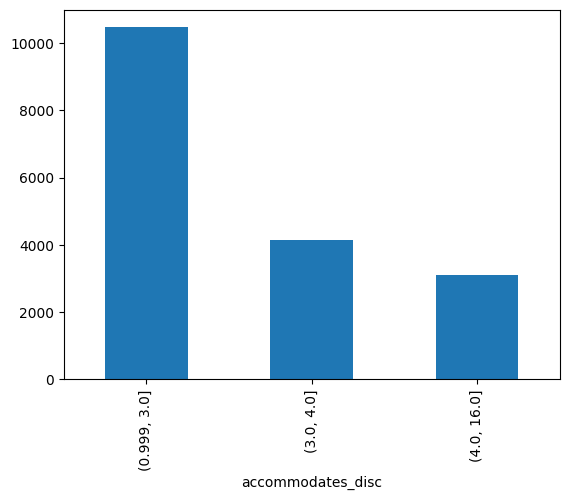

In [216]:
cortes=[0,0.5,0.8,1]
variable=df.accommodates


df['accommodates_disc']=pd.qcut(variable,cortes)
df.accommodates_disc.value_counts().plot.bar()

<Axes: xlabel='accommodates_disc'>

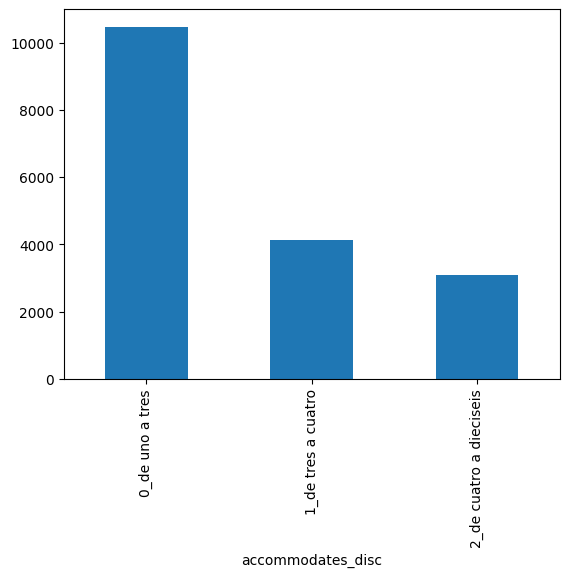

In [240]:
cortes=[0,0.5,0.8,1]
variable=df.accommodates


df['accommodates_disc']=pd.qcut(variable,cortes,labels=['0_de uno a tres','1_de tres a cuatro','2_de cuatro a dieciseis'])
df.accommodates_disc.value_counts().plot.bar()

## 3.3 Discretizar beds

<Axes: xlabel='beds'>

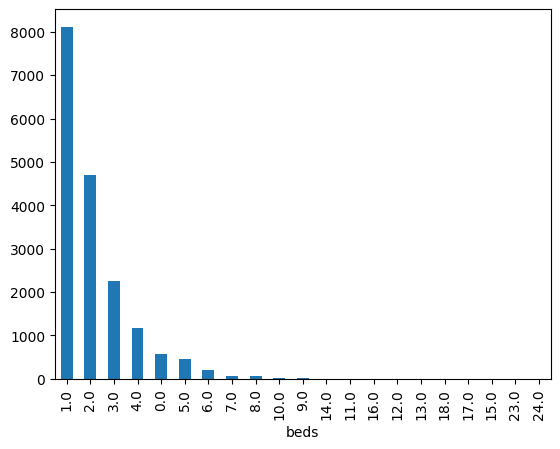

In [229]:
df.beds.value_counts().plot.bar()

Haré 3 grupos 1, 2 y 3 o más camas.

In [241]:
cond_beds=[(df.beds==1),(df.beds==2),(df.beds>=3)]
result_beds=['1_Uno','2_Dos','3_Tres_o_mas']

df['beds_disc']=np.select(cond_beds,result_beds,default=-999)

In [231]:
df.beds_disc.value_counts()

beds_disc
Uno           8114
Dos           4703
Tres_o_mas    4316
-999           577
Name: count, dtype: int64

Aparecen 577 nulos que se corresponden a 0 camas y no los he tenido en cuenta. Por eso voy a discretizar asumiendo que las 0 camas equivalen a 1. Ya que el equipo quiero comprar apartamentos con almenos 1 habitación. 

In [242]:
cond_beds=[(df.beds<=1),(df.beds==2),(df.beds>=3)]
result_beds=['1_Uno','2_Dos','3_Tres_o_mas']

df['beds_disc']=np.select(cond_beds,result_beds,default=-999)

In [233]:
df.bedrooms_disc.value_counts()

bedrooms_disc
Una             12422
Dos              3617
Tres             1228
Cuatro_o_mas      443
Name: count, dtype: int64

## 3.4 Discretizar number_of_reviews

<Axes: xlabel='number_of_reviews'>

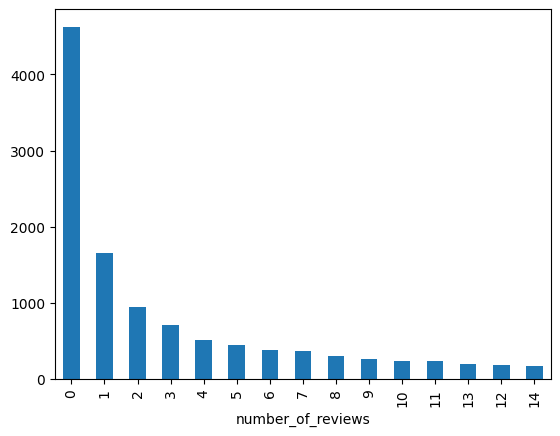

In [234]:
df.loc[df.number_of_reviews<15].number_of_reviews.value_counts().plot.bar()

Hay mucha variabilidad en esta variable y como no es muy determinante la voy a discretizar.

Debido a su gran rango de valores, voy a utilizar % de division.

<Axes: xlabel='number_of_reviews_disc'>

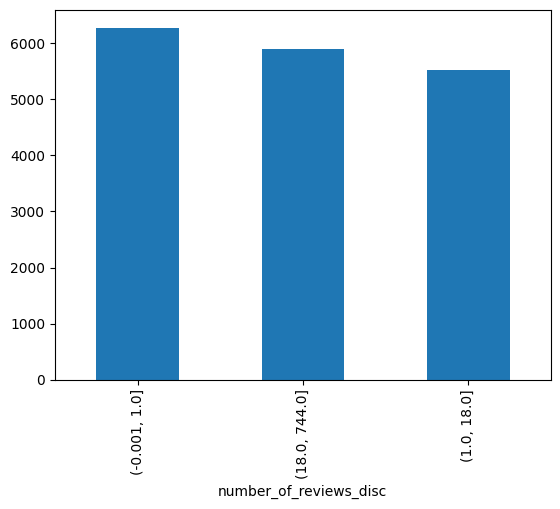

In [235]:
df['number_of_reviews_disc']=pd.qcut(df.number_of_reviews,[0,0.33,0.66,1])
df.number_of_reviews_disc.value_counts().plot.bar()

<Axes: xlabel='number_of_reviews_disc'>

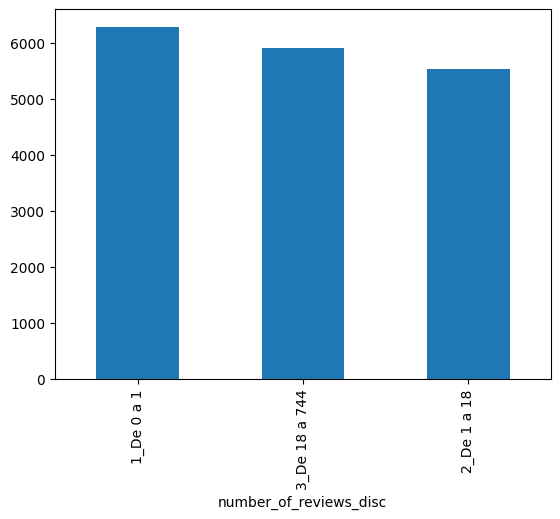

In [243]:
df['number_of_reviews_disc']=pd.qcut(df.number_of_reviews,[0,0.33,0.66,1],labels=['1_De 0 a 1','2_De 1 a 18','3_De 18 a 744'])
df.number_of_reviews_disc.value_counts().plot.bar()

In [237]:
df

,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,precio_m2,distrito,precio_total,ocupacion,m2,precio_compra,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc
0,0,6369,"Rooftop terrace room , ensuite bathroom",13660,Chamartín,Hispanoamérica,40.457240,-3.676880,Private room,60,...,5098,Chamartín,60.0,50.684932,50,254900,Una,de uno a tres,Uno,De 18 a 744
1,1,21853,Bright and airy room,83531,Latina,Cármenes,40.403810,-3.741300,Private room,31,...,2267,Latina,31.0,0.273973,50,113350,Una,de uno a tres,Uno,De 18 a 744
2,2,23001,Apartmento Arganzuela- Madrid Rio,82175,Arganzuela,Legazpi,40.388400,-3.695110,Entire home/apt,50,...,4085,Arganzuela,50.0,39.178082,90,367650,Tres,de cuatro a dieciseis,Tres_o_mas,De 0 a 1
3,3,24805,Gran Via Studio Madrid,346366726,Centro,Universidad,40.421830,-3.705290,Entire home/apt,92,...,4827,Centro,92.0,68.493151,50,241350,Una,de uno a tres,Uno,De 1 a 18
4,4,26825,Single Room whith private Bathroom,114340,Arganzuela,Legazpi,40.389750,-3.690180,Private room,26,...,4085,Arganzuela,26.0,4.383562,50,204250,Una,de uno a tres,Uno,De 18 a 744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17705,17705,52182264,Enormous Private Room in 12-Bedroom Unit - los...,378060726,Centro,Justicia,40.424384,-3.691216,Private room,29,...,4827,Centro,29.0,1.917808,50,241350,Una,de uno a tres,Uno,De 0 a 1
17706,17706,52182273,Stunning Private Room in 11-Bedroom Unit - los...,378060726,Centro,Justicia,40.424447,-3.691309,Private room,29,...,4827,Centro,29.0,1.917808,50,241350,Una,de uno a tres,Uno,De 0 a 1
17707,17707,52182303,Classic Private Room in 7-Bedroom Unit - los 3...,378060726,Centro,Justicia,40.424989,-3.691783,Private room,29,...,4827,Centro,29.0,1.917808,50,241350,Una,de uno a tres,Uno,De 0 a 1
17708,17708,52182321,Elegant Private Room in 12-Bedroom Unit - los ...,378060726,Salamanca,Recoletos,40.424352,-3.690211,Private room,29,...,6114,Salamanca,29.0,1.917808,50,305700,Una,de uno a tres,Uno,De 0 a 1


In [244]:

df.to_sql('df_prep',con=con,if_exists='replace')

17710